In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from statsmodels.tsa.filters.hp_filter import hpfilter  
  


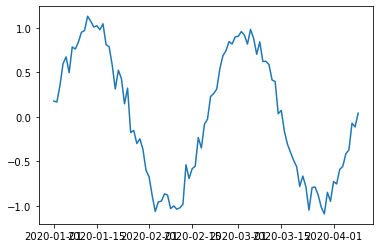

In [2]:
# 创建示例数据  
np.random.seed(0)  
n = 100  
dates = pd.date_range(start='1/1/2020', periods=n, freq='D')  
series = pd.Series(np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 0.1, n), index=dates)  
  
plt.plot(series, label='Original')  


2020-01-01   -0.396964
2020-01-02   -0.437920
2020-01-03   -0.286417
2020-01-04   -0.069828
2020-01-05   -0.021298
                ...   
2020-04-05    0.136630
2020-04-06    0.143243
2020-04-07    0.401519
2020-04-08    0.319661
2020-04-09    0.432974
Freq: D, Name: cycle, Length: 100, dtype: float64 2020-01-01    0.573369
2020-01-02    0.604528
2020-01-03    0.635439
2020-01-04    0.665580
2020-01-05    0.694251
                ...   
2020-04-05   -0.552169
2020-04-06   -0.513855
2020-04-07   -0.474080
2020-04-08   -0.433563
2020-04-09   -0.392775
Freq: D, Name: trend, Length: 100, dtype: float64


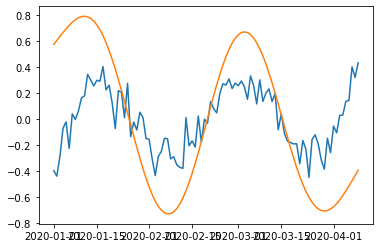

In [15]:
# 应用HP滤波器去除季节性  
series_hp = hpfilter(series, lamb=1600)  
seasonal = series_hp[0]  
trend = series_hp[1]  
  
# 将季节性和趋势成分转换为Pandas Series对象  
seasonal_series = pd.Series(seasonal, index=series.index)  
trend_series = pd.Series(trend, index=series.index)  
print(seasonal_series,trend_series)
plt.plot(seasonal_series, label='Seasonal')  
plt.plot(trend_series, label='Trend')  

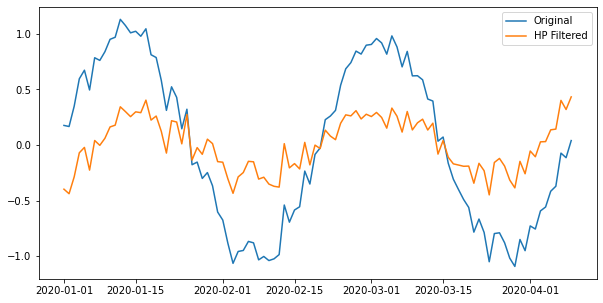

In [16]:
  # 绘制原始数据和滤波后的数据  
plt.figure(figsize=(10, 5))  
plt.plot(series, label='Original')  
plt.plot(seasonal_series, label='HP Filtered')  
plt.legend()  
plt.show()
